In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import time
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#train test validation split

# X,y = df.lemmatized,df.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_val = pd.read_csv('val.csv')

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preprocessed_text  4573 non-null   object
 1   target             4573 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.6+ KB


In [5]:
df_list = [df_train,df_test,df_val]
for df in df_list:
    df.astype({'target': 'int32'}).dtypes

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preprocessed_text  10287 non-null  object
 1   target             10287 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.9+ KB


In [7]:
X_train, y_train = df_train['preprocessed_text'], df_train['target']
X_test, y_test = df_test['preprocessed_text'], df_test['target']
X_val, y_val = df_val['preprocessed_text'], df_val['target']

In [8]:
df_train_pos = pd.read_csv('Data/train_pos.csv')
df_test_pos = pd.read_csv('Data/test_pos.csv')
df_val_pos = pd.read_csv('Data/val_pos.csv')

In [9]:
X_train_pos, y_train_pos = df_train_pos['lemmatized_and_pos'], df_train_pos['target']
X_test_pos, y_test_pos = df_test_pos['lemmatized_and_pos'], df_test_pos['target']
X_val_pos, y_val_pos = df_val_pos['lemmatized_and_pos'], df_val_pos['target']

In [10]:
#pipeline for logistic regression

pipe_logreg = Pipeline([
     ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf', LogisticRegression())
])

parameters_logreg = {
#     'tfidf__min_df': [0.001],
#     'tfidf__max_df': [0.5,0.75,1],
#     'tfidf__max_features': [None, 5000, 10000, 50000],
#     'tfidf__ngram_range': [(1,1)],  # unigrams or bigrams
    "clf__C": [0.1,1,10],
#     "clf__class_weight": ['balanced'],
    "clf__solver": ['newton-cg','lbfgs','sag','saga'],
    "clf__max_iter":[80,90,100,110,120],
#     "clf__multi_class":['multinomial','ovr'],
    "clf__penalty": ['l1','l2'],
    'clf__tol':[0.00005,0.0001, 0.0005]
}

gs_logreg = GridSearchCV(estimator=pipe_logreg,
            param_grid=parameters_logreg,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_logreg.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_logreg.best_score_)

# Best params
print('\nBest params:\n', gs_logreg.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 32.4min finished


Best accuracy: 0.710

Best params:
 {'clf__C': 1, 'clf__max_iter': 80, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'clf__tol': 0.0001}


In [11]:
#pipeline for logistic regression

pipe_logreg_pos = Pipeline([
     ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf', LogisticRegression())
])

parameters_logreg_pos = {
#     'tfidf__min_df': [0.001],
#     'tfidf__max_df': [0.5,0.75,1],
#     'tfidf__max_features': [None, 5000, 10000, 50000],
#     'tfidf__ngram_range': [(1,1)],  # unigrams or bigrams
    "clf__C": [0.1,1,10],
#     "clf__class_weight": ['balanced'],
    "clf__solver": ['newton-cg','lbfgs','sag','saga'],
    "clf__max_iter":[80,90,100,110,120],
#     "clf__multi_class":['multinomial','ovr'],
    "clf__penalty": ['l1','l2'],
    'clf__tol':[0.00005,0.0001, 0.0005]
}

gs_logreg_pos = GridSearchCV(estimator=pipe_logreg_pos,
            param_grid=parameters_logreg_pos,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_logreg_pos.fit(X_train_pos, y_train_pos)

# Best accuracy
print('Best accuracy: %.3f' % gs_logreg_pos.best_score_)

# Best params
print('\nBest params:\n', gs_logreg_pos.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 67.2min finished


Best accuracy: 0.829

Best params:
 {'clf__C': 10, 'clf__max_iter': 90, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'clf__tol': 5e-05}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [12]:
#pipeline for decision tree

pipe_tree = Pipeline([
     ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf', DecisionTreeClassifier())
])
parameters_tree = {
#     'tfidf__min_df': [0.001],
#     'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1, 1)],  # unigrams or bigrams
    "clf__criterion": ["gini"],
    "clf__max_depth":[250,300,500],
    "clf__min_samples_split" : [150,200,250]
}

gs_tree = GridSearchCV(estimator=pipe_tree,
            param_grid=parameters_tree,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_tree.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_tree.best_score_)

# Best params
print('\nBest params:\n', gs_tree.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   43.6s finished


Best accuracy: 0.495

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 150, 'tfidf__ngram_range': (1, 1)}


In [13]:
#pipeline for random forest

# pipe_rf = Pipeline([
#      ('tfidf', TfidfVectorizer(min_df=10)),
#     ('clf', RandomForestClassifier())
# ])
# parameters_rf = {
#     'tfidf__min_df': [3,5,10],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
#     "clf__criterion": ["gini", "entropy"],
#     "clf__max_depth":[75,100,150],
#     "clf__min_samples_split" : [75,100,150]
# }

# gs_rf = GridSearchCV(estimator=pipe_rf,
#             param_grid=parameters_rf,
#             scoring='accuracy',
#             cv=KFold(5,shuffle=True,random_state=42), 
#             return_train_score = True, verbose=1,n_jobs=-1)

# # Fit using grid search
# best_model = gs_rf.fit(X_train, y_train)

# # Best accuracy
# print('Best accuracy: %.3f' % gs_rf.best_score_)

# # Best params
# print('\nBest params:\n', gs_rf.best_params_)

In [14]:
#pipeline for NaiveBayes

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   MultinomialNB()),
])

parameters_nb = {
#     'vect__ngram_range': [(1,1),(1,2)],
#     'vect__min_df': [0.001],
    'clf__alpha': [0.01,0.05,0.1]
#     'tfidf__min_df': [0.001]
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__ngram_range': [(1, 1), (1, 2)]  # unigrams or bigrams

}

gs_nb = GridSearchCV(estimator=pipe_nb,
            param_grid=parameters_nb,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_nb.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_nb.best_score_)
#
# # # Best params
print('\nBest params:\n', gs_nb.best_params_)

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring='accuracy')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.5s finished


Best accuracy: 0.713

Best params:
 {'clf__alpha': 0.1}


In [15]:
#pipeline for NaiveBayes pos_tag

pipe_nb_pos = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   MultinomialNB()),
])

parameters_nb_pos = {
#     'vect__ngram_range': [(1,1),(1,2)],
#     'vect__min_df': [0.001],
    'clf__alpha': [0.01,0.05,0.1]
#     'tfidf__min_df': [0.001]
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__ngram_range': [(1, 1), (1, 2)]  # unigrams or bigrams

}

gs_nb_pos = GridSearchCV(estimator=pipe_nb_pos,
            param_grid=parameters_nb_pos,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_nb_pos.fit(X_train_pos, y_train_pos)

# Best accuracy
print('Best accuracy: %.3f' % gs_nb_pos.best_score_)
#
# # # Best params
print('\nBest params:\n', gs_nb_pos.best_params_)

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring='accuracy')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.5s finished


Best accuracy: 0.818

Best params:
 {'clf__alpha': 0.1}


In [16]:
#pipeline for svm
from sklearn.svm import SVC
pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   SVC()),
])

parameters_svm = {
#     'vect__min_df': [0.001],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1,1),(1, 2)],  # unigrams or bigrams
    "clf__C": [0.1,1,10],
    "clf__kernel":['linear'],
    "clf__class_weight" : ['balanced'],
    "clf__decision_function_shape":['ovo'],
    "clf__gamma":[1e-07,1e-06,1e-05]
}

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=parameters_svm,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 19.0min finished


Best accuracy: 0.691

Best params:
 {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__decision_function_shape': 'ovo', 'clf__gamma': 1e-07, 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 2)}


In [17]:
#pipeline for svm pos_tag
from sklearn.svm import SVC
pipe_svm_pos = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   SVC()),
])

parameters_svm_pos = {
#     'vect__min_df': [0.001],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1,1),(1, 2)],  # unigrams or bigrams
    "clf__C": [0.1,1,10],
    "clf__kernel":['linear'],
    "clf__class_weight" : ['balanced'],
    "clf__decision_function_shape":['ovo'],
    "clf__gamma":[1e-07,1e-06,1e-05]
}

gs_svm_pos = GridSearchCV(estimator=pipe_svm_pos,
            param_grid=parameters_svm_pos,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_svm_pos.fit(X_train_pos, y_train_pos)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm_pos.best_score_)

# Best params
print('\nBest params:\n', gs_svm_pos.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 37.4min finished


Best accuracy: 0.827

Best params:
 {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__decision_function_shape': 'ovo', 'clf__gamma': 1e-07, 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 2)}


In [18]:
#pipeline for random forest take 2

pipe_rf2 = Pipeline([
     ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf', RandomForestClassifier())
])
parameters_rf2 = {
#     'tfidf__min_df': [0.001],
#     'tfidf__max_df': [1.0],
    'tfidf__ngram_range': [(1,1),(1, 2)],  #bigrams
    "clf__criterion": ["gini"],
    "clf__max_depth":[500,1000],
    "clf__min_samples_split" : [20,30,40]
}

gs_rf2 = GridSearchCV(estimator=pipe_rf2,
            param_grid=parameters_rf2,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_rf2.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf2.best_score_)

# Best params
print('\nBest params:\n', gs_rf2.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


Best accuracy: 0.647

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__min_samples_split': 20, 'tfidf__ngram_range': (1, 2)}


In [19]:
#pipeline for knn

pipe_knn = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   KNeighborsClassifier()),
])

parameters_knn = {
#     'tfidf__min_df': [0.001],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__ngram_range': [(1,1),(1, 2)],  #  bigrams
#     "svd__n_components": [50,75,100],
    "clf__n_neighbors": [5,10,15],
    "clf__metric": ['minkowski']
}

gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=parameters_knn,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_knn.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_knn.best_score_)

# Best params
print('\nBest params:\n', gs_knn.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.3s finished


Best accuracy: 0.250

Best params:
 {'clf__metric': 'minkowski', 'clf__n_neighbors': 15}


In [20]:
#pipeline for SGD

pipe_sgd = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   SGDClassifier()),
])

parameters_sgd = {
#     'vect__min_df': [0.001],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'vect__ngram_range': [(1,1),(1, 2)],  #  bigrams
#     "clf__n_neighbors": [5,10,15],
#     "clf__metric": ['minkowski']
    "clf__penalty": ['l2','l1','elasticnet'],
    "clf__loss":['hinge','log','perceptron'],
    "clf__alpha":[1e-3,1e-2,1e-1]
}

gs_sgd = GridSearchCV(estimator=pipe_sgd,
            param_grid=parameters_sgd,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_sgd.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_sgd.best_score_)

# Best params
print('\nBest params:\n', gs_sgd.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.3min finished


Best accuracy: 0.698

Best params:
 {'clf__alpha': 0.001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}


In [28]:
#pipeline for SGD pos_tag

pipe_sgd_pos = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   SGDClassifier()),
])

parameters_sgd_pos = {
#     'vect__min_df': [0.001],
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'vect__ngram_range': [(1,1),(1, 2)],  #  bigrams
#     "clf__n_neighbors": [5,10,15],
#     "clf__metric": ['minkowski']
    "clf__penalty": ['l2','l1','elasticnet'],
    "clf__loss":['hinge','log','perceptron'],
    "clf__alpha":[1e-3,1e-2,1e-1]
}

gs_sgd_pos = GridSearchCV(estimator=pipe_sgd_pos,
            param_grid=parameters_sgd_pos,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search-pos
best_model = gs_sgd_pos.fit(X_train_pos, y_train_pos)

# Best accuracy
print('Best accuracy: %.3f' % gs_sgd_pos.best_score_)

# Best params
print('\nBest params:\n', gs_sgd_pos.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


Best accuracy: 0.801

Best params:
 {'clf__alpha': 0.001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}


In [32]:
#pipeline for SVC

pipe_svc = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   LinearSVC()),
])

parameters_svc = {
    "clf__penalty": ['l2','l1'],
    "clf__loss":['hinge','squared_hinge'],
    "clf__C":[0.05,0.1,0.2,0.3],
    "clf__tol":[1e-5,1e-4,1e-4]
}

gs_svc = GridSearchCV(estimator=pipe_svc,
            param_grid=parameters_svc,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_svc.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svc.best_score_)

# Best params
print('\nBest params:\n', gs_svc.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.5min finished


Best accuracy: 0.716

Best params:
 {'clf__C': 0.2, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l2', 'clf__tol': 1e-05}


In [33]:
#pipeline for SVC pos_tag

pipe_svc_pos = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10)),
    ('clf',   LinearSVC()),
])

parameters_svc_pos = {
    "clf__penalty": ['l2','l1'],
    "clf__loss":['hinge','squared_hinge'],
     "clf__C":[0.2,0.3,0.4],
    "clf__tol":[1e-7,1e-6,1e-5,1e-4,1e-3]
}

gs_svc_pos = GridSearchCV(estimator=pipe_svc_pos,
            param_grid=parameters_svc_pos,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_svc_pos.fit(X_train_pos, y_train_pos)

# Best accuracy
print('Best accuracy: %.3f' % gs_svc_pos.best_score_)

# Best params
print('\nBest params:\n', gs_svc_pos.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


Best accuracy: 0.834

Best params:
 {'clf__C': 0.3, 'clf__loss': 'squared_hinge', 'clf__penalty': 'l2', 'clf__tol': 1e-07}


In [40]:
gs_logreg.cv_results_['std_test_score'][gs_logreg.best_index_]

0.00825789997856088

In [42]:
models = [gs_logreg,gs_nb,gs_svm,gs_sgd,gs_svc]
models_pos = [gs_logreg_pos,gs_nb_pos,gs_svm_pos,gs_sgd_pos,gs_svc_pos]

In [53]:
labels = ['Logistic Regression','Naive Bayes','SVM','SGD','LinearSVM']

lemmatized_scores = []
lemmatized_std = []

for model in models:
    lemmatized_scores.append(model.best_score_)
    lemmatized_std.append(model.cv_results_['std_test_score'][model.best_index_])

pos_scores = []
pos_std = []


for model in models_pos:
    pos_scores.append(model.best_score_)
    pos_std.append(model.cv_results_['std_test_score'][model.best_index_])

In [50]:
pos_scores

[0.8287735849056604,
 0.8184905660377358,
 0.8272641509433962,
 0.8011320754716982,
 0.8335849056603774]

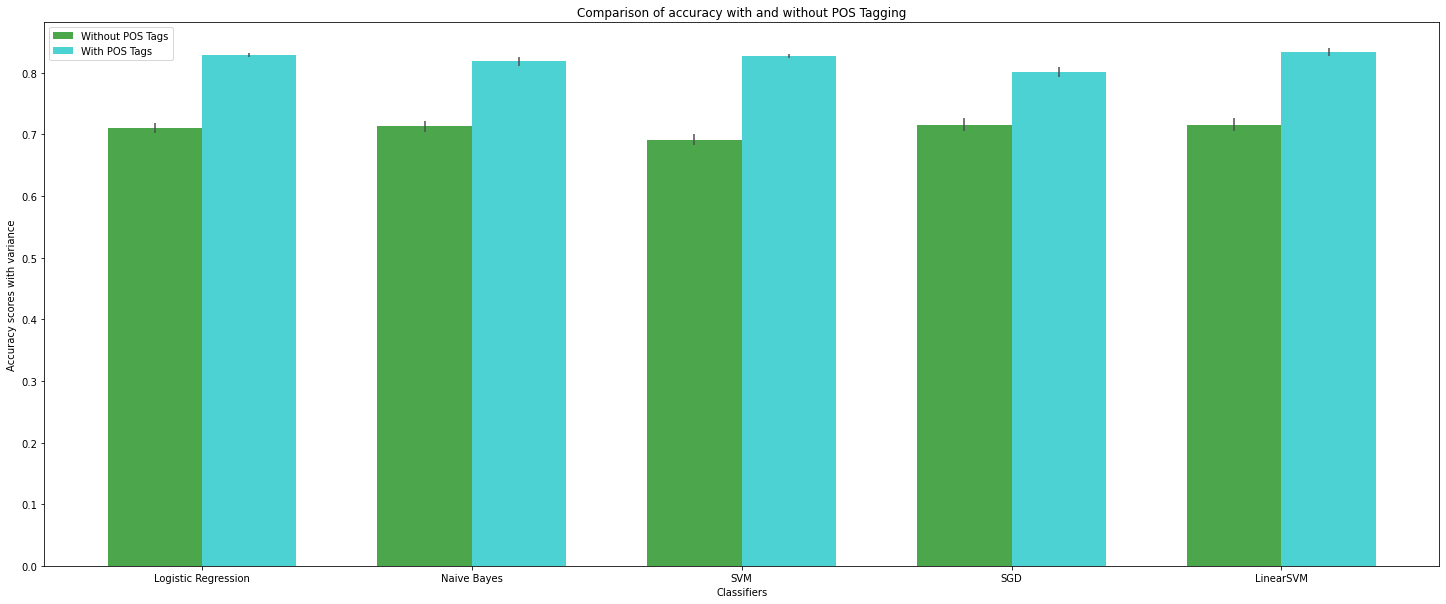

In [54]:
fig, ax = plt.subplots(figsize=(25,10))
n_groups = len(labels)
index = np.arange(n_groups)
bar_width = 0.35

opacity = .7
error_config = {'ecolor': '0.3'}

normal_clf = ax.bar(index, lemmatized_scores, bar_width, alpha=opacity, color='g', yerr=lemmatized_std, error_kw=error_config, label='Without POS Tags')
bagging_clf = ax.bar(index + bar_width, pos_scores, bar_width, alpha=opacity, color='c', yerr=pos_std, error_kw=error_config, label='With POS Tags')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Comparison of accuracy with and without POS Tagging')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()

#fig.tight_layout()

plt.show()